<a href="https://colab.research.google.com/github/yadavanujkumar/ev-range-prediction/blob/main/ev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Washington State Department of Licensing provides detailed records of all registered electric vehicles (EVs), including attributes such as County, City, Postal Code, Model Year, Make, Model, Electric Vehicle Type (BEV/PHEV), Clean Alternative Fuel Vehicle Eligibility, Electric Range, Base MSRP, Legislative District, Electric Utility, and Census Tract.

Goal:
Develop a predictive model that estimates the electric driving range of a newly registered EV given its make, model year, type (BEV or PHEV), base MSRP, and geographic features (county, utility provider, census tract).

In [5]:
# -----------------------------
# 1. Importing Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# -----------------------------
# 2. Loading Dataset
# -----------------------------
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electric_Vehicle_Population_Data.csv')

In [3]:
dataset.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
dataset.shape

(261698, 17)

In [ ]:
dataset.describe

<bound method NDFrame.describe of         VIN (1-10)     County          City State  Postal Code  Model Year  \
0       JTDKN3DP2D     Yakima        Yakima    WA      98902.0        2013   
1       1FMCU0E1XS     Kitsap  Port Orchard    WA      98366.0        2025   
2       JM3KKBHA9R     Kitsap      Kingston    WA      98346.0        2024   
3       7SAYGDEE8P   Thurston       Olympia    WA      98501.0        2023   
4       5YJ3E1EB5K   Thurston       Rainier    WA      98576.0        2019   
...            ...        ...           ...   ...          ...         ...   
261693  KNDC4DLC8P      Clark     Vancouver    WA      98665.0        2023   
261694  1GYKPNRL6S  Snohomish     Snohomish    WA      98296.0        2025   
261695  1N4BZ0CP8G       King       Seattle    WA      98144.0        2016   
261696  7SAYGDEE8T       King        Renton    WA      98055.0        2026   
261697  5YJ3E1EA4P       King       Bothell    WA      98011.0        2023   

            Make    Model                   Electric Vehicle Type  \
0         TOYOTA    PRIUS  Plug-in Hybrid Electric Vehicle (PHEV)   
1           FORD   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
2          MAZDA    CX-90  Plug-in Hybrid Electric Vehicle (PHEV)   
3          TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
4          TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
...          ...      ...                                     ...   
261693       KIA      EV6          Battery Electric Vehicle (BEV)   
261694  CADILLAC    LYRIQ          Battery Electric Vehicle (BEV)   
261695    NISSAN     LEAF          Battery Electric Vehicle (BEV)   
261696     TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
261697     TESLA  MODEL 3          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                   Not eligible due to low battery range             6.0   
1                 Clean Alternative Fuel Vehicle Eligible            37.0   
2                   Not eligible due to low battery range            26.0   
3       Eligibility unknown as battery range has not b...             0.0   
4                 Clean Alternative Fuel Vehicle Eligible           220.0   
...                                                   ...             ...   
261693  Eligibility unknown as battery range has not b...             0.0   
261694  Eligibility unknown as battery range has not b...             0.0   
261695            Clean Alternative Fuel Vehicle Eligible            84.0   
261696  Eligibility unknown as battery range has not b...             0.0   
261697  Eligibility unknown as battery range has not b...             0.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  15.0       165252538   
1             0.0                  26.0       278572521   
2             0.0                  23.0       275123642   
3             0.0                  35.0       249569323   
4             0.0                  20.0       283135107   
...           ...                   ...             ...   
261693        0.0                  49.0       234925078   
261694        0.0                   1.0       275487509   
261695        0.0                  37.0       117655261   
261696        0.0                  33.0       282644701   
261697        0.0                   1.0       256200906   

                   Vehicle Location  \
0       POINT (-120.51904 46.59783)   
1       POINT (-122.63847 47.54103)   
2        POINT (-122.4977 47.79802)   
3       POINT (-122.89165 47.03954)   
4       POINT (-122.68993 46.88897)   
...                             ...   
261693  POINT (-122.64443 45.67871)   
261694   POINT (-122.1389 47.87115)   
261695  POINT (-122.30866 47.57874)   
261696  POINT (-122.20784 47.46004)   
261697  POINT (-122.20563 47.76144)   

                                         Electric Utility  2020 Census Tract  
0                 

In [ ]:
dataset.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [7]:
# -----------------------------
# 3. Data Preprocessing
# -----------------------------
# Droping unnecessary identifiers
dataset = dataset.drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location'], errors='ignore')

dataset['Base MSRP'] = dataset['Base MSRP'].fillna(dataset['Base MSRP'].median())
dataset['Electric Range'] = dataset['Electric Range'].fillna(dataset['Electric Range'].median())
dataset['Electric Utility'] = dataset['Electric Utility'].fillna("Unknown")
dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna("Unknown")

cols_with_nan = dataset.columns[dataset.isnull().any()].tolist()

for col in cols_with_nan:
    if dataset[col].dtype in ['int64', 'float64']:
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        dataset[col] = dataset[col].fillna("Unknown")


# Feature engineering: Vehicle Age
# Creating a new feature 'Vehicle_Age' by subtracting 'Model Year' from the current year (2025)
dataset['Vehicle_Age'] = 2025 - dataset['Model Year']

# Target variable
# Defining the target variable 'y' as 'Electric Range'
y = dataset['Electric Range']

X = dataset.drop(columns=['Electric Range'])

In [8]:
# -----------------------------
# 4. Encoding Categorical Features
# -----------------------------
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [9]:
# -----------------------------
# 5. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# -----------------------------
# 6. Modeling
# -----------------------------

# Decision Tree
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeRegressor(random_state=42))])
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Neural Network
mlp_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', MLPRegressor(hidden_layer_sizes=(64, 32),
                                                   max_iter=300, random_state=42))])
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_test)

In [14]:
# -----------------------------
# 7. Evaluation
# -----------------------------
# Define a function to evaluate the models
def evaluate(y_true, y_pred, model_name):
    print(f"\n🔹 {model_name} Results")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))

evaluate(y_test, dt_preds, "Decision Tree")
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, mlp_preds, "Neural Network")


🔹 Decision Tree Results
MAE: 0.4735054351350683
R²: 0.9971732441138543

🔹 Random Forest Results
MAE: 0.45071972824501166
R²: 0.9977712838466347

🔹 Neural Network Results
MAE: 0.8428657198785263
R²: 0.997758892997916


/tmp/ipython-input-265994822.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, palette='viridis')


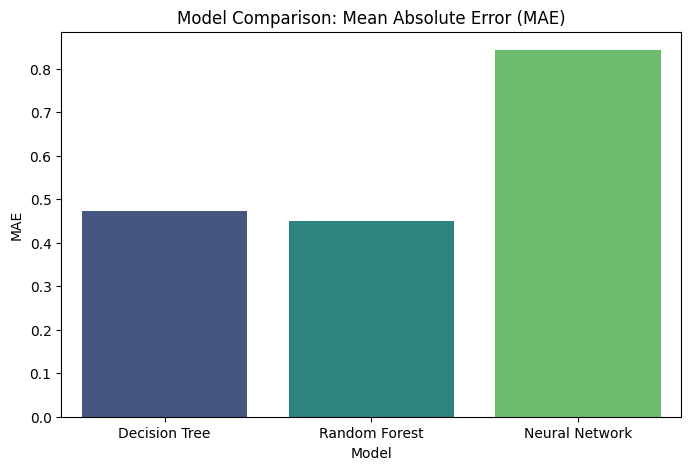

/tmp/ipython-input-265994822.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='R²', data=metrics_df, palette='viridis')


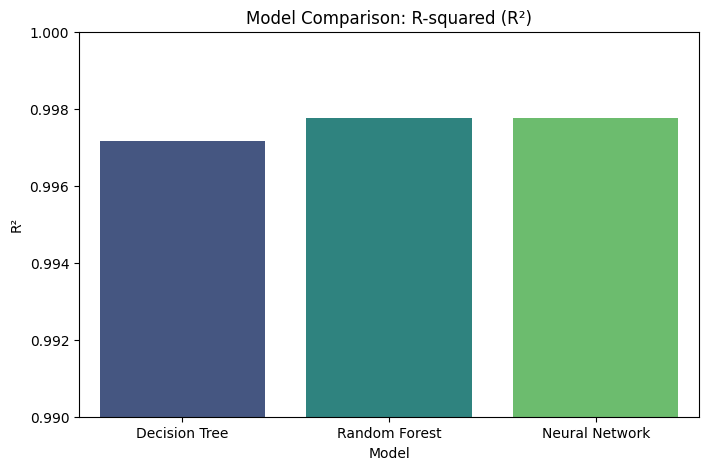

In [15]:
# -----------------------------
# 8. Visualization - Model Comparison
# -----------------------------
# Store metrics in a dictionary for easy plotting
model_metrics = {
    'Decision Tree': {'MAE': mean_absolute_error(y_test, dt_preds),
                      'R²': r2_score(y_test, dt_preds)},
    'Random Forest': {'MAE': mean_absolute_error(y_test, rf_preds),
                      'R²': r2_score(y_test, rf_preds)},
    'Neural Network': {'MAE': mean_absolute_error(y_test, mlp_preds),
                       'R²': r2_score(y_test, mlp_preds)}
}

metrics_df = pd.DataFrame(model_metrics).T

# Plot MAE
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, palette='viridis')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()

# Plot R²
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_df.index, y='R²', data=metrics_df, palette='viridis')
plt.title('Model Comparison: R-squared (R²)')
plt.ylabel('R²')
plt.xlabel('Model')
plt.ylim(0.99, 1.0) # Set limits for better visualization of small differences
plt.show()

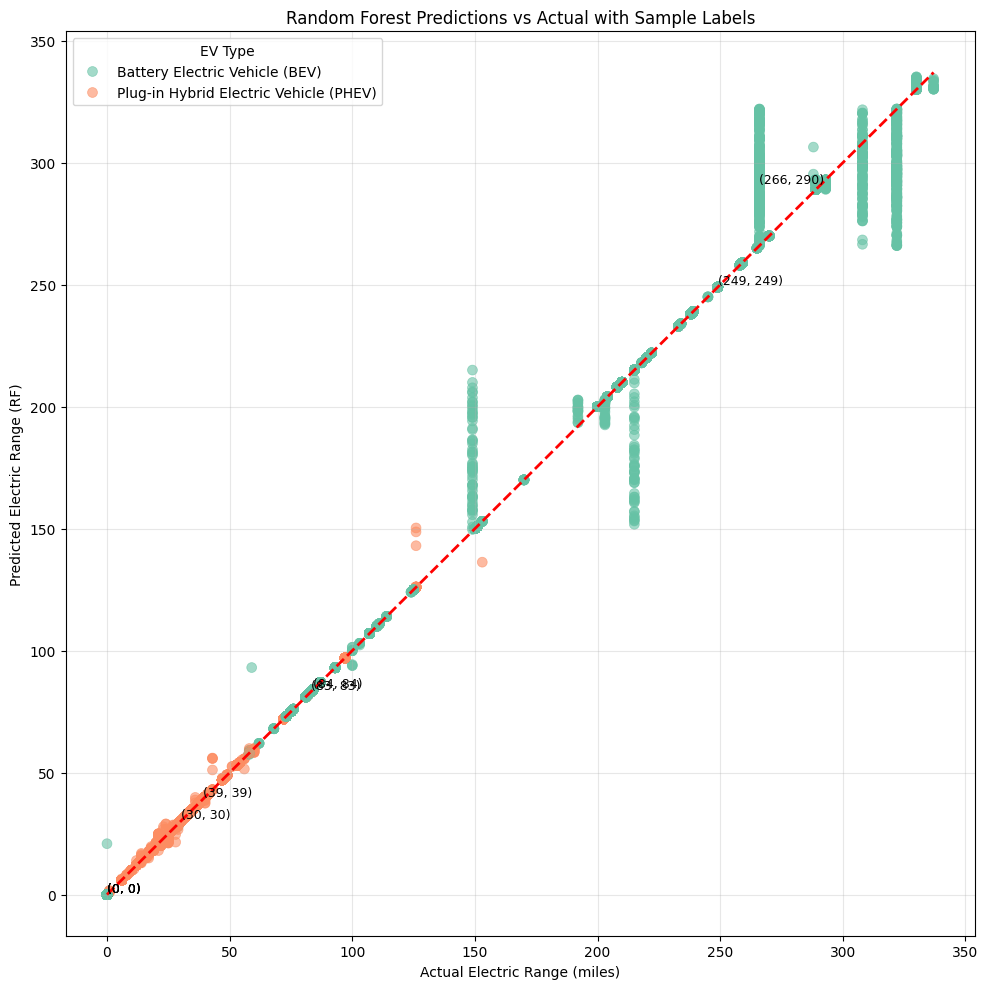

In [16]:
# -----------------------------
# 8. Visualization
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,10))

sns.scatterplot(
    x=y_test,
    y=rf_preds,
    hue=X_test['Electric Vehicle Type'],
    palette='Set2',
    alpha=0.6,
    edgecolor=None,
    s=50
)
plt.legend(title="EV Type")

#  range for the reference line
line_start = min(y_test.min(), rf_preds.min())
line_end   = max(y_test.max(), rf_preds.max())
plt.plot([line_start, line_end], [line_start, line_end], 'r--', lw=2)


sample_indices = np.random.choice(X_test.index, size=10, replace=False)

for i in sample_indices:
    actual_range = y_test.loc[i]
    predicted_range = rf_preds[X_test.index.get_loc(i)] # predicted value using index location
    plt.text(actual_range, predicted_range, f'({actual_range:.0f}, {predicted_range:.0f})', fontsize=9, ha='left', va='bottom')


plt.xlabel("Actual Electric Range (miles)")
plt.ylabel("Predicted Electric Range (RF)")
plt.title("Random Forest Predictions vs Actual with Sample Labels")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# ============================================================
# 9. EV Range Clustering  (KMeans + Gaussian Mixture Model)
# ============================================================

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


#  relevant numerical features for clustering
cluster_features = dataset[['Base MSRP', 'Vehicle_Age', 'Electric Range']].copy()


scaler = StandardScaler()
# Scale selected features
cluster_scaled = scaler.fit_transform(cluster_features)

# ------------------- KMEANS -------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(cluster_scaled)

dataset['KMeans_Cluster'] = kmeans_labels

cluster_range_means = dataset.groupby('KMeans_Cluster')['Electric Range'].mean().sort_values()
range_order = {cluster: idx for idx, cluster in enumerate(cluster_range_means.index)}
dataset['Range_Segment'] = dataset['KMeans_Cluster'].map(range_order)

print("\nK-Means Range Means:")
print(cluster_range_means)




K-Means Range Means:
KMeans_Cluster
1      5.782572
2    118.486342
0    160.848191
Name: Electric Range, dtype: float64


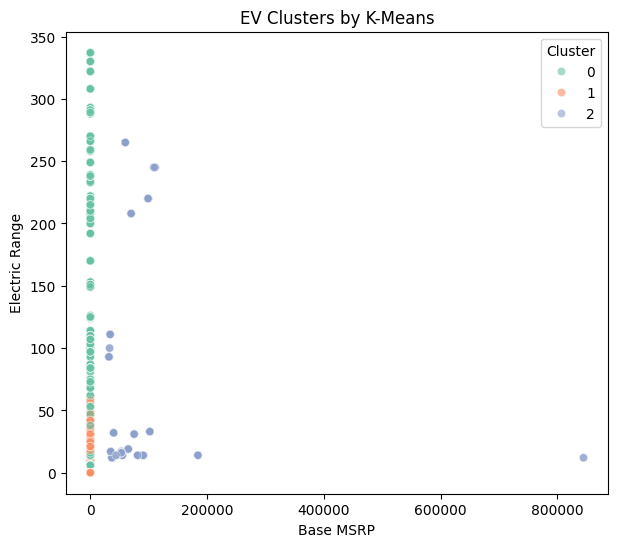

In [21]:
# ------------------- Visualization -------------------
plt.figure(figsize=(7,6))
sns.scatterplot(
    x='Base MSRP',
    y='Electric Range',
    hue='KMeans_Cluster',
    palette='Set2',
    data=dataset,
    alpha=0.6
)
plt.title("EV Clusters by K-Means")
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.legend(title="Cluster")
plt.show()